In [64]:
!pip install -q textblob
!python -m textblob.download_corpora
!pip install -q scikit-learn
!pip install -q pandas
!pip install -q numpy
!pip install -q matplotlib
!pip install -q seaborn

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [65]:
from textblob import TextBlob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
data = pd.read_csv("/content/sentimentdataset.csv")

In [67]:
def sentiment_analysis(text):
  blob = TextBlob(text)
  if blob.sentiment.polarity > 0:
    return "Positive"
  elif blob.sentiment.polarity < 0:
    return "Negative"
  else:
    return "Neutral"

In [68]:
data["Sentiment"] = data["Text"].apply(sentiment_analysis)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(data["Text"], data["Sentiment"], test_size=0.2, random_state=42)

In [70]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

In [71]:
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [72]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [73]:
lr = LogisticRegression(C=10, solver='liblinear')
lr.fit(X_train_tfidf, y_train)

LogisticRegression(C=10, solver='liblinear')

In [74]:
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [75]:
y_pred_nb = nb.predict(X_test_tfidf)
y_pred_lr = lr.predict(X_test_tfidf)
y_pred_rf = rf.predict(X_test_tfidf)

In [76]:
print("Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Naive Bayes:
Accuracy: 0.564625850340136
Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        28
     Neutral       0.50      0.90      0.65        60
    Positive       0.72      0.49      0.59        59

    accuracy                           0.56       147
   macro avg       0.41      0.46      0.41       147
weighted avg       0.50      0.56      0.50       147

Confusion Matrix:
[[ 0 23  5]
 [ 0 54  6]
 [ 0 30 29]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression:
Accuracy: 0.6394557823129252
Classification Report:
              precision    recall  f1-score   support

    Negative       0.67      0.21      0.32        28
     Neutral       0.57      0.85      0.68        60
    Positive       0.77      0.63      0.69        59

    accuracy                           0.64       147
   macro avg       0.67      0.56      0.57       147
weighted avg       0.67      0.64      0.62       147

Confusion Matrix:
[[ 6 18  4]
 [ 2 51  7]
 [ 1 21 37]]


In [78]:
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest:
Accuracy: 0.6054421768707483
Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.21      0.34        28
     Neutral       0.53      0.97      0.68        60
    Positive       0.83      0.42      0.56        59

    accuracy                           0.61       147
   macro avg       0.74      0.53      0.53       147
weighted avg       0.71      0.61      0.57       147

Confusion Matrix:
[[ 6 19  3]
 [ 0 58  2]
 [ 1 33 25]]


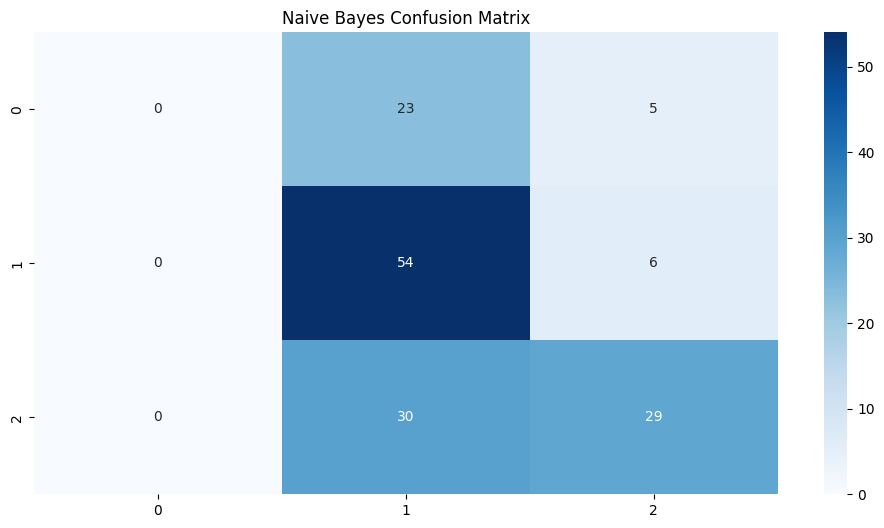

In [79]:
plt.figure(figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, cmap="Blues")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

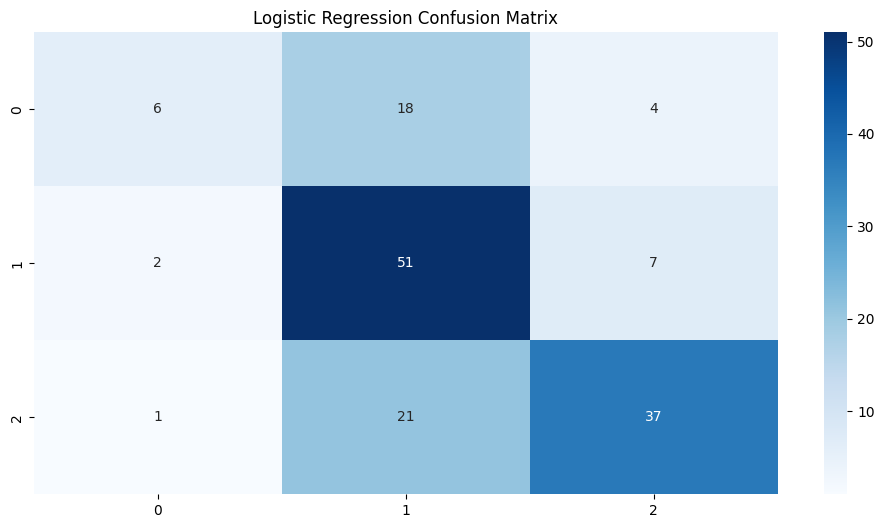

In [80]:
plt.figure(figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

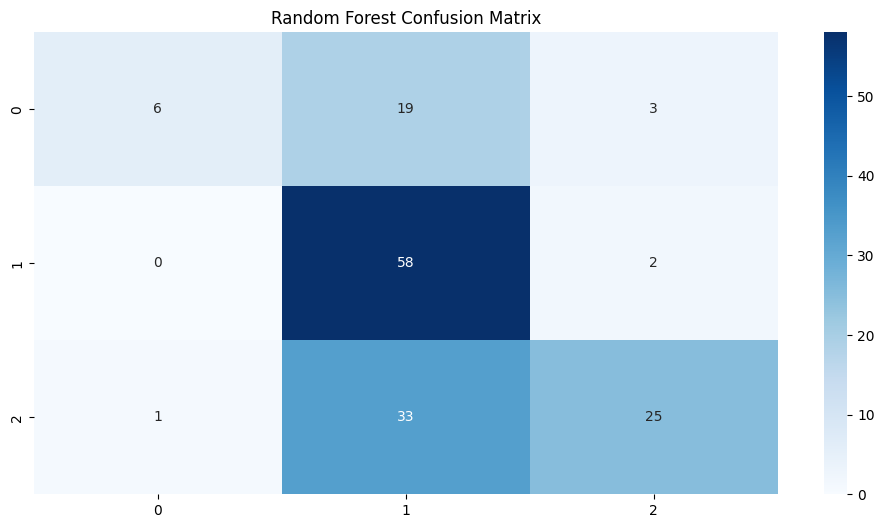

In [81]:
plt.figure(figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [82]:
accuracy = lr.score(X_test_tfidf, y_test)
print(f'Model accuracy: {accuracy:.3f}')

Model accuracy: 0.639


In [83]:
accuracy = rf.score(X_test_tfidf, y_test)
print(f'Model accuracy: {accuracy:.3f}')

Model accuracy: 0.605


In [84]:
import pickle

In [88]:
with open('model1.pkl', 'wb') as f:
    pickle.dump({'vectorizer': vectorizer, 'model': lr}, f)

In [90]:
with open('model2.pkl', 'wb') as f:
    pickle.dump({'vectorizer': vectorizer, 'model': rf}, f)